In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from pathlib import Path

from numpy import mean
from numpy import absolute
from numpy import sqrt
from numpy import arange

import pandas as pd
import matplotlib as plt
import seaborn as sns


def GetFileOutPutName(regression):
  #  return 'solution.csv'
  return 'Kaggle-Submission\\' + regression + '-' + datetime.now().strftime("%Y%m%d-%I%M%S%p") + '.csv'


# ************************
# the following selection contains lots of feature engineering where I found an enum value has an
# impact on the dataset

def TwoStoryHouse(style):
    if style == "2Story":
        return 1
    return 0

def OneStoryHouse(style):
    if style == "1Story":
        return 1
    return 0

def OneFiveStoryHouse(style):
    if style == "1.5Fin":
        return 1
    return 0

def BadQuality(quality):
    if quality <= 4:
        return 1
    return 0
    
def GoodQuality(quality):
    if ( quality == 5 or quality == 6 ):
        return 1
    return 0

def BetterQuality(quality):
    if ( quality == 7 ):
        return 1
    return 0

def BestQuality(quality):
    if ( quality == 8  ):
        return 1
    return 0

def GreatQuality(quality):
    if ( quality == 9 or quality == 10 ):
        return 1
    return 0



def KitchenScore(kitchen):
    if kitchen == "Ex": 
        return 1 
    elif kitchen == "Gd":
        return .60
    elif kitchen == "TA":
        return .40
    elif kitchen == "Fa":
        return .0
    elif kitchen == "Po":
        return .0
    return .5
    

def NeighborhoodScore(neighborhood):
    if neighborhood == "StoneBr": 
        return 1 
    elif neighborhood == "NridgHt":
        return 1
    elif neighborhood == "Veenker":
        return .95
    elif neighborhood == "Somerst":
        return .79
    elif neighborhood == "Timber":
        return .78
    elif neighborhood == "Blmngton":
        return .76
    elif neighborhood == "CollgCr":
        return .75
    elif neighborhood == "NoRidge":
        return .75
    elif neighborhood == "Mitchel":
        return .50
    elif neighborhood == "ClearCr":
        return .49
    elif neighborhood == "Crawfor":
        return .48
    elif neighborhood == "Gilbert":
        return .48
    elif neighborhood == "SawyerW":
        return .48
    elif neighborhood == "NPKVill":
        return .42
    elif neighborhood == "Sawyer":
        return .41
    elif neighborhood == "NAmes":
        return .40
    elif neighborhood == "NWAmes":
        return .39 
    elif neighborhood == "BrkSide":
        return .32
    elif neighborhood == "Blueste":
        return .28
    elif neighborhood == "Edwards":
        return .24
    elif neighborhood == "MeadowV":
        return .22
    elif neighborhood == "BrDale":
        return .20
    elif neighborhood == "IDOTRR":
        return .14
    elif neighborhood == "OldTown":
        return .12
    elif neighborhood == "SWISU":
        return .00
    
    return .50


def MSSubClassScore(subclass):
    if subclass == 20: 
        return .75 
    elif subclass == 30:
        return .33
    elif subclass == 40:
        return .31
    elif subclass == 45:
        return .55
    elif subclass == 50:
        return .21
    elif subclass == 60:
        return .58
    elif subclass == 70:
        return .21
    elif subclass == 75:
        return .04
    elif subclass == 80:
        return .61
    elif subclass == 85:
        return .90
    elif subclass == 90:
        return .05
    elif subclass == 120:
        return 1.00
    elif subclass == 160:
        return .28
    elif subclass == 180:
        return .68
    elif subclass == 190:
        return .02

    return .5


def MSZoningScore(zoning):

    if zoning == "FV": 
        return 1.0
    elif zoning == "RL":
        return .95
    elif zoning == "RM":
        return .90
    elif zoning == "RH":
        return .10

    return .1



ames_test = pd.read_csv('sampledata/test.csv')
ames_data = pd.read_csv('sampledata/train.csv')

# the outlieries to eliminate are at the top the market in the price per square foot range
# I did lots of tweaking to end up with the .01 top of the market based on price per square foot.
ames_data["Price_Per_Square_Foot"] = ames_data["SalePrice"] / ames_data["GrLivArea"]
q_hi  = ames_data["Price_Per_Square_Foot"].quantile(0.99 )


# ames_data.describe()
ames_filtered = ames_data[(ames_data["Price_Per_Square_Foot"] < q_hi)]
ames_data = ames_filtered

scaler = StandardScaler()
ames_data["Price_Per_Square_Foot"] = ames_data["SalePrice"] / ames_data["GrLivArea"]
ames_data["NeighborhoodScore"] = ames_data["Neighborhood"].apply(NeighborhoodScore)
ames_data["KitchenScore"] = ames_data["KitchenQual"].apply(KitchenScore)
ames_data[["GrLivAreaScaled"]] = scaler.fit_transform(ames_data[["GrLivArea"]])
ames_data[["OverallQualScaled"]] = scaler.fit_transform(ames_data[["OverallQual"]])
ames_data[["YearBuiltScaled"]] = scaler.fit_transform(ames_data[["YearBuilt"]])
ames_data[["YearRemodAddScaled"]] = scaler.fit_transform(ames_data[["YearRemodAdd"]])
ames_data[["BsmtFinSF1Scaled"]] = scaler.fit_transform(ames_data[["BsmtFinSF1"]])
ames_data[["TotalBsmtSFScaled"]] = scaler.fit_transform(ames_data[["TotalBsmtSF"]])
ames_data[["1stFlrSFScaled"]] = scaler.fit_transform(ames_data[["1stFlrSF"]])
ames_data[["GarageCarsScaled"]] = scaler.fit_transform(ames_data[["GarageCars"]])
ames_data[["GarageAreaScaled"]] = scaler.fit_transform(ames_data[["GarageArea"]])

ames_data['BadQuality'] = ames_data["OverallQual"].apply(BadQuality)
ames_data['GoodQuality'] = ames_data["OverallQual"].apply(GoodQuality)
ames_data['BetterQuality'] = ames_data["OverallQual"].apply(BetterQuality)
ames_data['BestQuality'] = ames_data["OverallQual"].apply(BestQuality)
ames_data['GreatQuality'] = ames_data["OverallQual"].apply(GreatQuality)

ames_data['TwoStoryHouse'] = ames_data["HouseStyle"].apply(TwoStoryHouse)
ames_data['OneStoryHouse'] = ames_data["HouseStyle"].apply(OneStoryHouse)
ames_data['OneFiveStoryHouse'] = ames_data["HouseStyle"].apply(OneFiveStoryHouse)
ames_data['MSSubClassScore'] = ames_data["MSSubClass"].apply(MSSubClassScore)

ames_data['MSZoningScore'] = ames_data["MSSubClass"].apply(MSZoningScore)


ames_test["NeighborhoodScore"] = ames_test["Neighborhood"].apply(NeighborhoodScore)
ames_test["KitchenScore"] = ames_test["KitchenQual"].apply(KitchenScore)
ames_test[["GrLivAreaScaled"]] = scaler.fit_transform(ames_test[["GrLivArea"]])
ames_test[["OverallQualScaled"]] = scaler.fit_transform(ames_test[["OverallQual"]])
ames_test[["YearBuiltScaled"]] = scaler.fit_transform(ames_test[["YearBuilt"]])
ames_test[["YearRemodAddScaled"]] = scaler.fit_transform(ames_test[["YearRemodAdd"]])
ames_test[["BsmtFinSF1Scaled"]] = scaler.fit_transform(ames_test[["BsmtFinSF1"]])
ames_test[["TotalBsmtSFScaled"]] = scaler.fit_transform(ames_test[["TotalBsmtSF"]])
ames_test[["1stFlrSFScaled"]] = scaler.fit_transform(ames_test[["1stFlrSF"]])
ames_test[["GarageCarsScaled"]] = scaler.fit_transform(ames_test[["GarageCars"]])
ames_test[["GarageAreaScaled"]] = scaler.fit_transform(ames_test[["GarageArea"]])

ames_test['BadQuality']    = ames_test["OverallQual"].apply(BadQuality)
ames_test['GoodQuality']   = ames_test["OverallQual"].apply(GoodQuality)
ames_test['BetterQuality'] = ames_test["OverallQual"].apply(BetterQuality)
ames_test['BestQuality']   = ames_test["OverallQual"].apply(BestQuality)
ames_test['GreatQuality']  = ames_test["OverallQual"].apply(GreatQuality)

ames_test['TwoStoryHouse'] = ames_test["HouseStyle"].apply(TwoStoryHouse)
ames_test['OneStoryHouse'] = ames_test["HouseStyle"].apply(OneStoryHouse)
ames_test['OneFiveStoryHouse'] = ames_test["HouseStyle"].apply(OneFiveStoryHouse)

ames_test['MSSubClassScore'] = ames_test["MSSubClass"].apply(MSSubClassScore)
ames_test['MSZoningScore'] = ames_test["MSSubClass"].apply(MSZoningScore)

# regressionType = "Lasso"
regressionType = "Ridge"
# regressionType = "Regression"
# regressionType = "ElasticNet"

#define predictor and response variables
#scaling did not always produce better results - scale when necessary


# X = ames_data[['OverallQualScaled','YearBuiltScaled','YearRemodAddScaled','KitchenScore','NeighborhoodScore','BsmtFinSF1Scaled','TotalBsmtSFScaled','1stFlrSFScaled','GarageCarsScaled','GarageAreaScaled']]
X = ames_data[['GrLivArea','OverallQual','YearBuiltScaled','YearRemodAddScaled','KitchenScore','NeighborhoodScore','BsmtFinSF1','TotalBsmtSF','1stFlrSF','GarageArea','BadQuality','GreatQuality','OneStoryHouse', 'MSSubClassScore','MSZoningScore']]
y = ames_data['Price_Per_Square_Foot']

# Q = ames_test[['OverallQualScaled','YearBuiltScaled','YearRemodAddScaled','KitchenScore','NeighborhoodScore','BsmtFinSF1Scaled','TotalBsmtSFScaled','1stFlrSFScaled','GarageCarsScaled','GarageAreaScaled']]
Q = ames_test[['GrLivArea','OverallQual','YearBuiltScaled','YearRemodAddScaled','KitchenScore','NeighborhoodScore','BsmtFinSF1','TotalBsmtSF','1stFlrSF','GarageArea','BadQuality','GreatQuality','OneStoryHouse','MSSubClassScore','MSZoningScore']]

# linear regression
lm = LinearRegression()
linearModel = lm.fit(X, y)
regression = linearModel.predict(Q)

#lasso 
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
lassoModel = LassoCV(alphas=arange(0.5, 1, 0.5), cv=cv, n_jobs=-1)
lassoModel = lassoModel.fit(X, y)
lasso = lassoModel.predict(Q)

#ridge model
ridgeModel = RidgeCV(alphas=[1e-2, 1e-1, 1, 10]).fit(X, y)
# ridgeModel = RidgeCV(alphas=[3, 6, 9, 12]).fit(X, y)

ridge = ridgeModel.predict(Q)

#elasticNet
elasticModel = ElasticNet(random_state=0)
elasticModel = elasticModel.fit(X, y)
elastic = elasticModel.predict(Q)

#********************************************
# manage the output

newFrame = pd.DataFrame(ames_test['Id'])
#hold onto price per square foot for metric purposes

if regressionType == "Lasso":
    newFrame['Price_Per_Square_Foot'] = lasso.tolist()
elif regressionType == "Regression":
    newFrame['Price_Per_Square_Foot'] = regression.tolist()
elif regressionType == "Ridge":
    newFrame['Price_Per_Square_Foot'] = ridge.tolist()
elif regressionType == "ElasticNet":
    newFrame['Price_Per_Square_Foot'] = elastic.tolist()


newFrame['SqFeet'] = ames_test['GrLivArea']
newFrame['Neighborhood'] = ames_test['Neighborhood']
newFrame['NeighborhoodScore'] = ames_test['NeighborhoodScore']
newFrame['Price_Per_Square_Foot'] = newFrame['Price_Per_Square_Foot'] 

newFrame['SalePrice'] = newFrame['Price_Per_Square_Foot'] * newFrame['SqFeet'] 
filename = GetFileOutPutName(regressionType)
newFrame.to_csv(filename, index=False)
newFrame.drop(['Price_Per_Square_Foot','SqFeet','Neighborhood','NeighborhoodScore'], axis=1, inplace = True )
filename = GetFileOutPutName(regressionType + '-Submit')
newFrame.to_csv(filename, index=False)

# total_sales = newFrame.groupby(['Neighborhood'])['SalePrice'].agg('sum')
# total_square_feet = newFrame.groupby(['Neighborhood'])['SqFeet'].agg('sum')
# perSquareFoot = total_sales.div(total_square_feet, level="Neighborhood")


#end of output
#************************************

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

if regressionType == "Lasso":
    model = lassoModel
elif regressionType == "Regression":
    model = linearModel
elif regressionType == "Ridge":
    model = ridgeModel
elif regressionType == "ElasticNet":
    model = elasticModel

print("********************")
print("This Model: ")
#use k-fold CV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error',
                        cv=cv, n_jobs=-1)
print( mean(absolute(scores)))


print("********************")
print("Lasso: ")
#use k-fold CV to evaluate model
scores = cross_val_score(lassoModel, X, y, scoring='neg_mean_absolute_error',
                        cv=cv, n_jobs=-1)
#view mean absolute error
print( mean(absolute(scores)))

print("********************")
print("Ridge: ")
#use k-fold CV to evaluate model
scores = cross_val_score(ridgeModel, X, y, scoring='neg_mean_absolute_error',
                        cv=cv, n_jobs=-1)
#view mean absolute error
print( mean(absolute(scores)))


print("********************")
print("ElasticNet: ")
#use k-fold CV to evaluate model
scores = cross_val_score(elasticModel, X, y, scoring='neg_mean_absolute_error',
                        cv=cv, n_jobs=-1)
#view mean absolute error
print( mean(absolute(scores)))



# print(lassoModel.alpha_)








<AxesSubplot:>

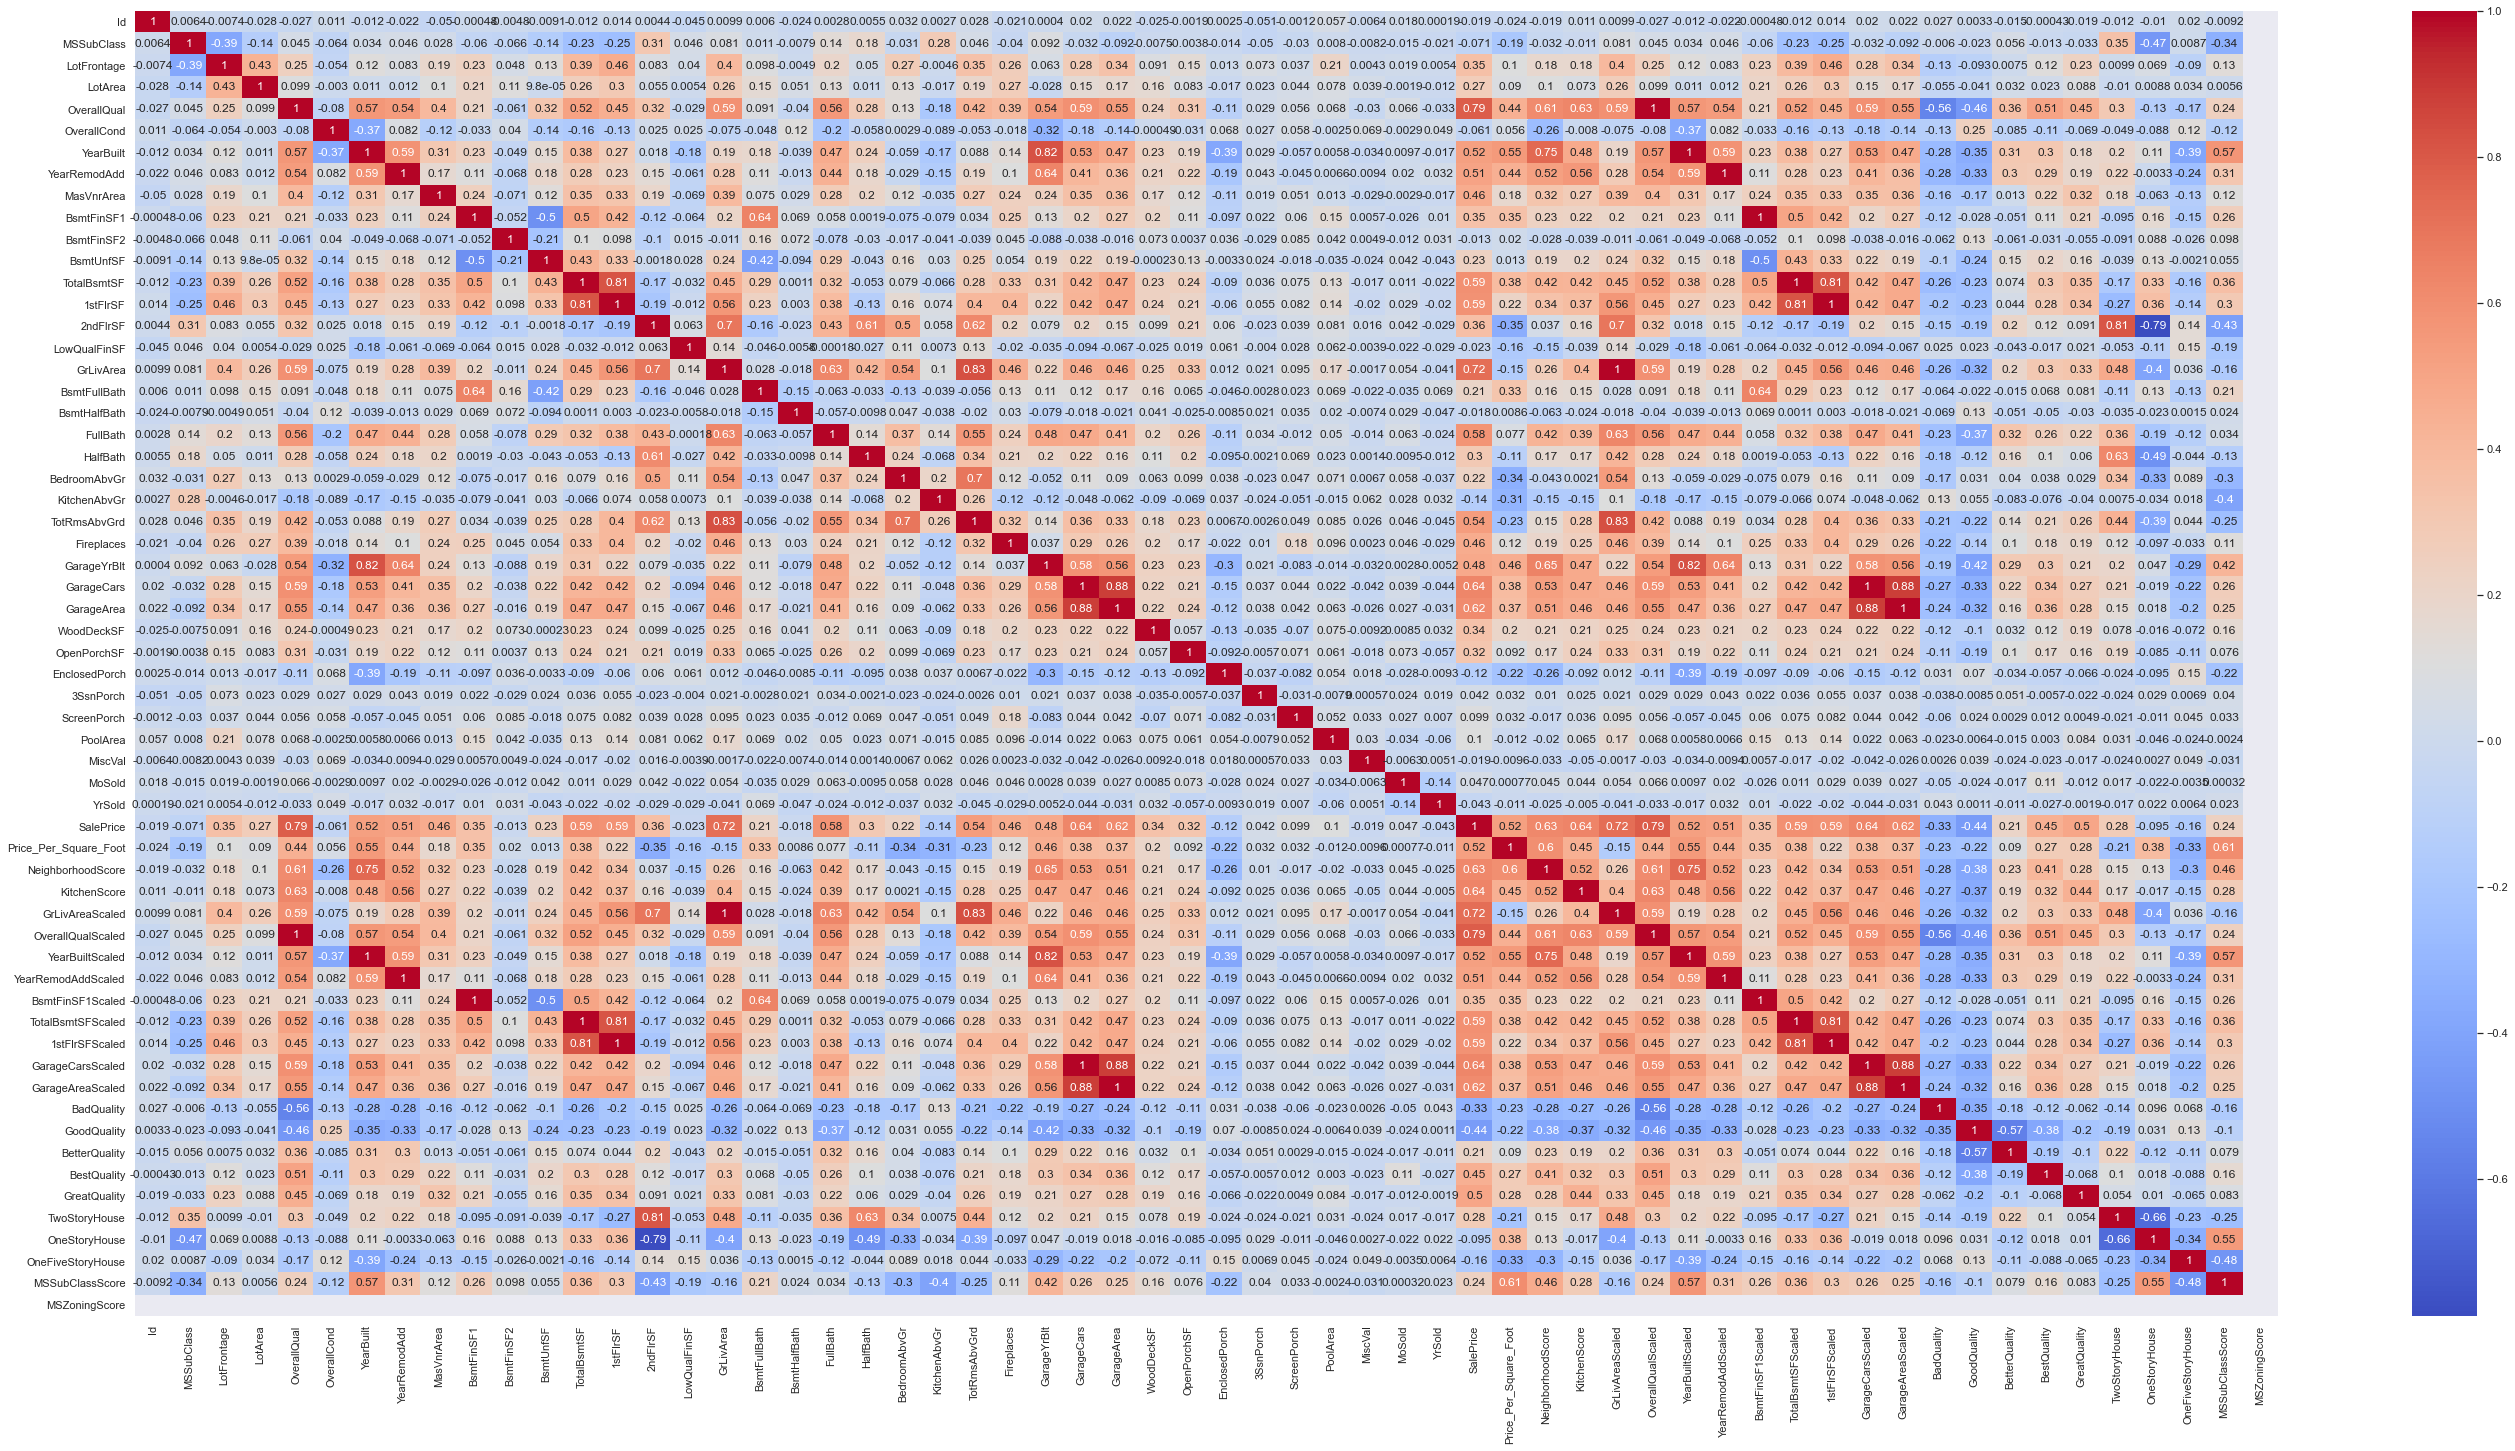

In [20]:
sns.set(rc={'figure.figsize':(48,24)})

sns.heatmap(ames_data.corr(), cmap='coolwarm',annot=True)

In [5]:
total_sales = newFrame.groupby(['Neighborhood'])['SalePrice'].agg('sum')

total_square_feet = newFrame.groupby(['Neighborhood'])['SqFeet'].agg('sum')

perSquareFoot = newFrame.div(total_square_feet, level="Neighborhood")

f = perSquareFoot.to_frame()
f["Neighborhood"] = perSquareFoot.index

f.rename( columns={0 :'Price_per_squre_foot'}, inplace=True )
sorted_neighborhood_by_sqrfoot = f.sort_values(['Price_per_squre_foot'],ascending=False)

from matplotlib import rcParams
rcParams['figure.figsize'] = 20,8

# sns.barplot(x="Neighborhood", y="Price_per_squre_foot",data=sorted_neighborhood_by_sqrfoot)

print(sorted_neighborhood_by_sqrfoot)


AssertionError: 